***
# <font color=green size=10>**2ª ENTREGA DO PROJETO DATA SCIENCE APLICADO À SAÚDE**</font>
***

**>> Nome completo dos integrantes da equipe**

*Ammabel Costa Lopes e Andreza Oliveira Gonçalves*


**>> Tema do projeto**

Análise Preditiva do Risco Neonatal nos Primeiros Minutos de Vida

**>> Banco de dados consultado**

Sistema de Informação sobre Nascidos Vivos - Sinasc dos anos de 2020 e 2023. https://opendatasus.saude.gov.br/dataset/sistema-de-informacao-sobre-nascidos-vivos-sinasc/resource/2b5225fd-520d-4e5b-92e8-d7c801d16090


**>> Banco de dados utilizado**

*Informe o link do banco de dados que você pré-processou e efetivamente utilizou. Salve o banco pré-processado em csv e coloque numa nuvem para poder gerar um link. Cuide que este link não demande autorização para que seja possível acessá-lo.*
https://drive.google.com/file/d/1GcpLgvhDCqw7bPZ4Eps8v0YQzjRzhyoW/view?usp=sharing
https://drive.google.com/file/d/1CFZbXKS2izZEb3rDYRkeDYhdEcNhpEd7/view?usp=sharing

## <font color=green size=6>**Desenvolvimento do projeto**</font>

**>> Problema a ser solucionado**

Nosso modelo pode prever o índice de Apgar nos primeiros minutos de vida, ajudando médicos a identificar recém-nascidos de risco com base nos dados maternos e do parto.


### **01. Importação de bibliotecas necessárias para o projeto.**

In [2]:
!pip install anvil-uplink

  Using cached argparse-1.4.0-py2.py3-none-any.whl.metadata (2.8 kB)
Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)


In [3]:
import anvil.server

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as pyplot
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score
import seaborn as sns
from seaborn import heatmap
import plotly.express as px
import numpy as np
import joblib

### **02. Importação do banco de dados a ser utilizado.**

In [5]:
#Criamos um arquivo csv com número reduzidos de linhas para facilitar o processamento, pois se trata de dois banco de dados.
#O link acima aponta para estes já reduzidos para 2000 linhas, "amostra2020" e "amostra2023".

In [6]:
#Cria dataframe de dados 2020
dados2020 = pd.read_csv('/content/amostra2020.csv', sep= ';', on_bad_lines='skip')

<ipython-input-6-1f97a81d2228>:2: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  dados2020 = pd.read_csv('/content/amostra2020.csv', sep= ';', on_bad_lines='skip')


In [7]:
#Cria dataframe de dados 2023
dados2023 = pd.read_csv('/content/amostra2023.csv', sep= ';', on_bad_lines='skip')

<ipython-input-7-f612e096de53>:2: DtypeWarning: Columns (34) have mixed types. Specify dtype option on import or set low_memory=False.
  dados2023 = pd.read_csv('/content/amostra2023.csv', sep= ';', on_bad_lines='skip')


**2.1 Pré-processamento dos dados para produzir o banco de dados para análise exploratória.**

In [8]:
#Retirando colunas que não serão utilizadas
dados2020 = dados2020.drop(columns=['CONTADOR', 'ORIGEM', 'TPDOCRESP', 'HORANASC', 'CONSULTAS', 'DTCADASTRO', 'APGAR1', 'CODESTAB', 'ESTCIVMAE', 'ESCMAE', 'CODOCUPMAE', 'CODMUNRES', 'SEXO', 'RACACOR', 'PESO', 'CODANOMAL', 'DTDECLARAC', 'ESCMAEAGR1', 'STDNNOVA', 'CODPAISRES', 'KOTELCHUCK', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA','DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010', 'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'IDADEPAI', 'SEMAGESTAC', 'TPMETESTIM', 'TPAPRESENT', 'STTRABPART', 'TPNASCASSI', 'TPFUNCRESP', 'STDNEPIDEM', 'DTULTMENST', 'TPROBSON' ])

#Retirando colunas que não serão utilizadas
dados2023 = dados2023.drop(columns=['contador', 'ORIGEM', 'TPDOCRESP', 'HORANASC', 'CONSULTAS', 'DTCADASTRO', 'APGAR1', 'CODESTAB', 'ESTCIVMAE', 'ESCMAE', 'CODOCUPMAE', 'CODMUNRES', 'SEXO', 'RACACOR', 'PESO', 'CODANOMAL', 'DTDECLARAC', 'ESCMAEAGR1', 'STDNNOVA', 'CODPAISRES', 'KOTELCHUCK', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA','DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010', 'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'IDADEPAI', 'SEMAGESTAC', 'TPMETESTIM', 'TPAPRESENT', 'STTRABPART', 'TPNASCASSI', 'TPFUNCRESP', 'STDNEPIDEM', 'DTULTMENST', 'TPROBSON', 'OPORT_DN' ])

# Substitui NaN por 0
dados2020 = dados2020.fillna(0)
dados2023 = dados2023.fillna(0)


In [9]:
#Renomeando colunas 2020
dados2020 = dados2020.rename(columns={
    "CODMUNNASC": "codigo_municipio_nascimento",
    "LOCNASC": "local_nascimento",
    "DTNASC": "data_nascimento",
    "IDADEMAE": "idade_mae",
    "QTDFILVIVO": "qtd_filhos_vivos",
    "QTDFILMORT": "qtd_filhos_mortos",
    "GESTACAO": "tempo_gestacao",
    "GRAVIDEZ": "tipo_gravidez",
    "PARTO": "tipo_parto",
    "APGAR5": "apgar_5_minuto",
    "IDANOMAL": "indicador_anomalia",
    "QTDGESTANT": "qtd_gestacoes",
    "QTDPARTNOR": "qtd_partos_normais",
    "QTDPARTCES": "qtd_partos_cesarea",
    "CONSPRENAT": "consultas_prenatais",
    "MESPRENAT": "mes_inicio_prenatal",
    "STCESPARTO": "cesarea_eletiva",
    "PARIDADE": "paridade",
})


In [10]:
#Renomeando colunas 2023
dados2023 = dados2023.rename(columns={
    "CODMUNNASC": "codigo_municipio_nascimento",
    "LOCNASC": "local_nascimento",
    "DTNASC": "data_nascimento",
    "IDADEMAE": "idade_mae",
    "QTDFILVIVO": "qtd_filhos_vivos",
    "QTDFILMORT": "qtd_filhos_mortos",
    "GESTACAO": "tempo_gestacao",
    "GRAVIDEZ": "tipo_gravidez",
    "PARTO": "tipo_parto",
    "APGAR5": "apgar_5_minuto",
    "IDANOMAL": "indicador_anomalia",
    "QTDGESTANT": "qtd_gestacoes",
    "QTDPARTNOR": "qtd_partos_normais",
    "QTDPARTCES": "qtd_partos_cesarea",
    "CONSPRENAT": "consultas_prenatais",
    "MESPRENAT": "mes_inicio_prenatal",
    "STCESPARTO": "cesarea_eletiva",
    "PARIDADE": "paridade",
})

### **03. Separação do dataframe em dados de teste e de treino ou outra organização necessária antes de aplicar a técnica de IA escolhida.**

In [11]:
# @title 1ª Passo para árvore de regressão
#Criamos primeiramente uma árvore com dados de 2020 e treinaremos com de 2023

features2020 = dados2020.drop(['codigo_municipio_nascimento', 'data_nascimento', 'local_nascimento', 'tempo_gestacao', 'tipo_gravidez', 'paridade', 'cesarea_eletiva', 'qtd_partos_cesarea', 'qtd_filhos_mortos', 'qtd_partos_normais', 'apgar_5_minuto'], axis = 1)
target2020 = dados2020['apgar_5_minuto']

#Divisão dos dados de teste e de treino
feat_train1, feat_test1, targ_train1, targ_test1 = train_test_split(
    features2020, target2020, test_size = 0.3, random_state = 1
)

<Axes: >

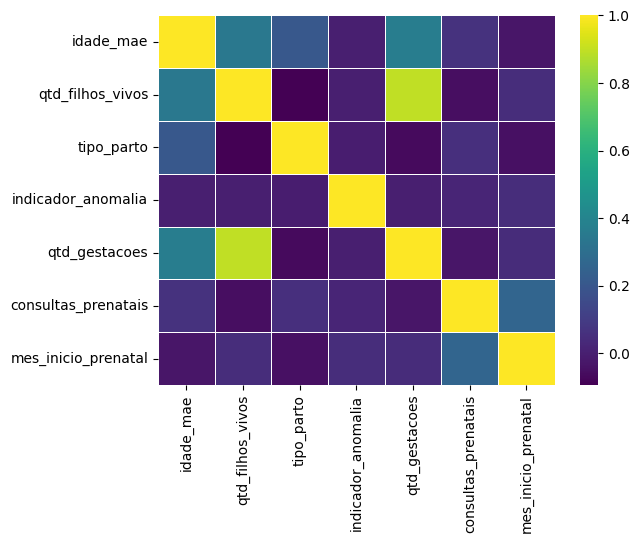

In [12]:
#O índice de Apgar é um sistema de pontuação de 0 a 10 usado para avaliar rapidamente a condição de um recém-nascido logo após o nascimento.
#Grau de importância de cada feature em relação ao Apgar no 1º minuto
# Criamos uma instância do elemento árvore
tree = DecisionTreeRegressor()

#Treinamento da árvore de 2020
tree_trained1 = tree.fit(feat_train1, targ_train1)
targ_predicted1 = tree_trained1.predict(feat_test1)

#Visualizar gráfico de correlação
heatmap(features2020.corr(method='pearson'), cmap='viridis', linewidths=.5)

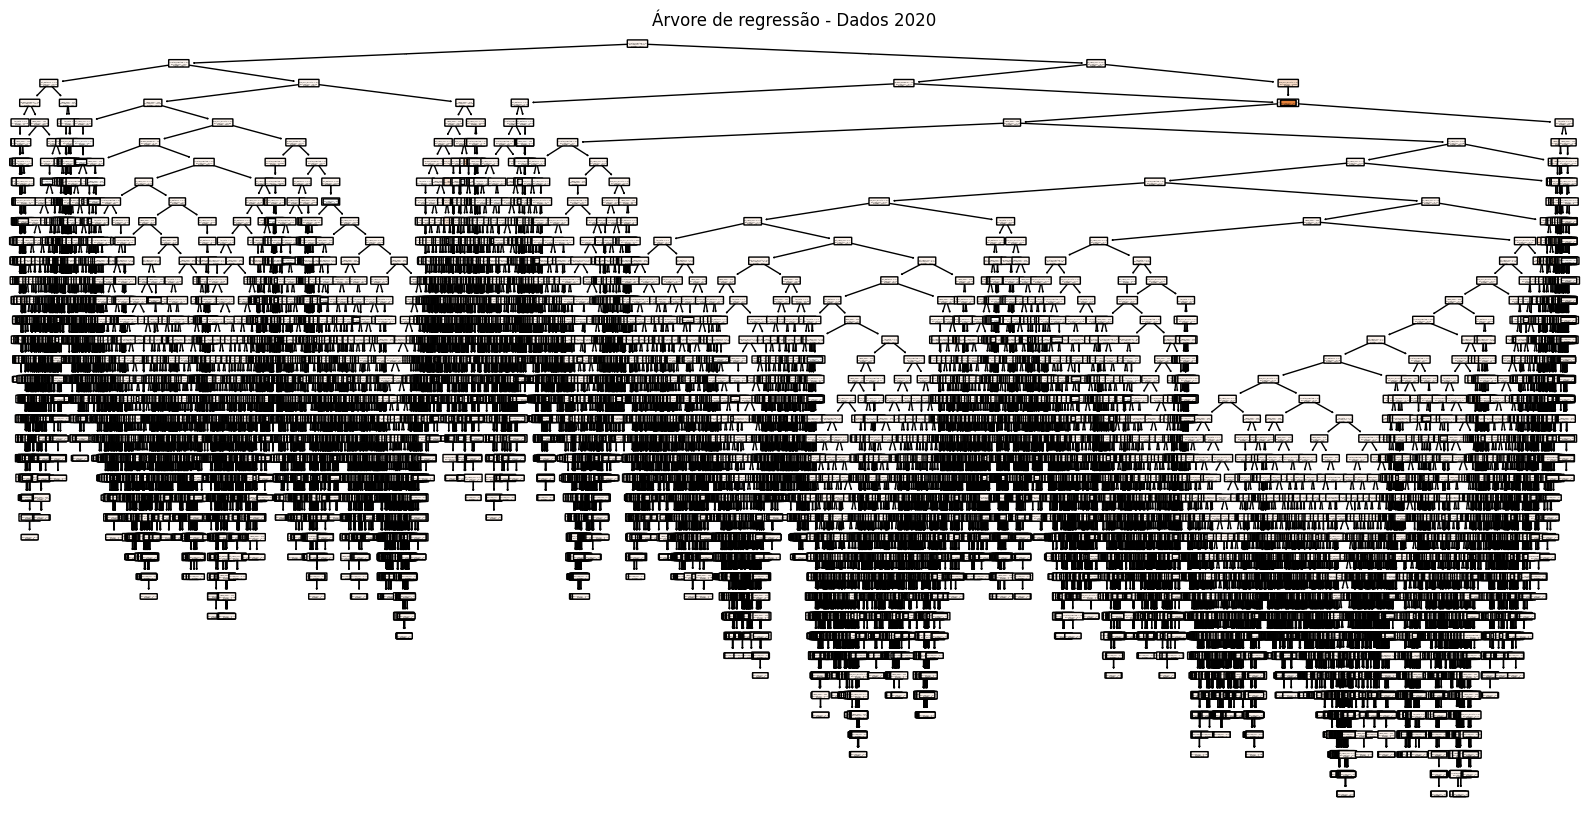

In [ ]:
# @title Plotando a árvore de regressão
pyplot.figure(figsize=(20,10))
# Convert target_combinado.unique() to a list of strings
class_names = [str(x) for x in target2020.unique()]
plot_tree(tree_trained1,
          feature_names=feat_train1.columns,
          class_names=class_names, # Pass the list of strings
          filled=True,
          rounded=True)
pyplot.title("Árvore de regressão - Dados 2020")
pyplot.show()

In [13]:
# Avaliação do modelo
mae_1 = mean_absolute_error(targ_test1, targ_predicted1)
mse_1 = mean_squared_error(targ_test1, targ_predicted1)
r2_1 = r2_score(targ_test1, targ_predicted1)

print(f"Erro Absoluto Médio (MAE): {mae_1:.4f}")
print(f"Erro Quadrático Médio (MSE): {mse_1:.4f}")
print(f"Coeficiente de Determinação (R²): {r2_1:.4f}")

Erro Absoluto Médio (MAE): 1.0393
Erro Quadrático Médio (MSE): 11.9830
Coeficiente de Determinação (R²): -0.9500


### **04. Criação do modelo de IA.**

In [14]:
#@title 2ª Passo para árvore de regressão
from scipy.stats import zscore
# Realizar a junção (merge) dos dois datasets
dados_combinados = pd.concat([dados2020, dados2023], axis=0)

dados_combinados = dados_combinados[(zscore(dados_combinados) < 3).all(axis=1)]

# Separar as features e target novamente
features_combinadas = dados_combinados.drop(['codigo_municipio_nascimento', 'data_nascimento', 'local_nascimento', 'tempo_gestacao', 'tipo_gravidez', 'paridade', 'cesarea_eletiva', 'qtd_partos_cesarea', 'qtd_filhos_mortos', 'qtd_partos_normais', 'apgar_5_minuto'], axis = 1)
target_combinado = dados_combinados['apgar_5_minuto']

# Divisão dos dados de treino e teste
feat_train_comb, feat_test_comb, targ_train_comb, targ_test_comb = train_test_split(
    features_combinadas, target_combinado, test_size=0.3, random_state=1
)


In [41]:
features_combinadas

,idade_mae,qtd_filhos_vivos,tipo_parto,indicador_anomalia,qtd_gestacoes,consultas_prenatais,mes_inicio_prenatal
0,30.0,0.0,1.0,2.0,0.0,10.0,0.0
1,19.0,1.0,1.0,2.0,1.0,8.0,2.0
2,33.0,1.0,2.0,2.0,2.0,10.0,3.0
3,23.0,3.0,1.0,2.0,4.0,5.0,2.0
6,33.0,2.0,1.0,2.0,2.0,10.0,3.0
...,...,...,...,...,...,...,...
99993,24.0,0.0,2.0,2.0,0.0,11.0,4.0
99994,33.0,0.0,2.0,2.0,0.0,9.0,2.0
99995,19.0,1.0,2.0,2.0,1.0,8.0,1.0
99998,30.0,1.0,2.0,2.0,2.0,5.0,2.0


In [15]:
# Re-treinando a árvore de regressão com os dados combinados
tree_trained_comb = tree.fit(feat_train_comb, targ_train_comb)
targ_predicted_comb = tree_trained_comb.predict(feat_test_comb)

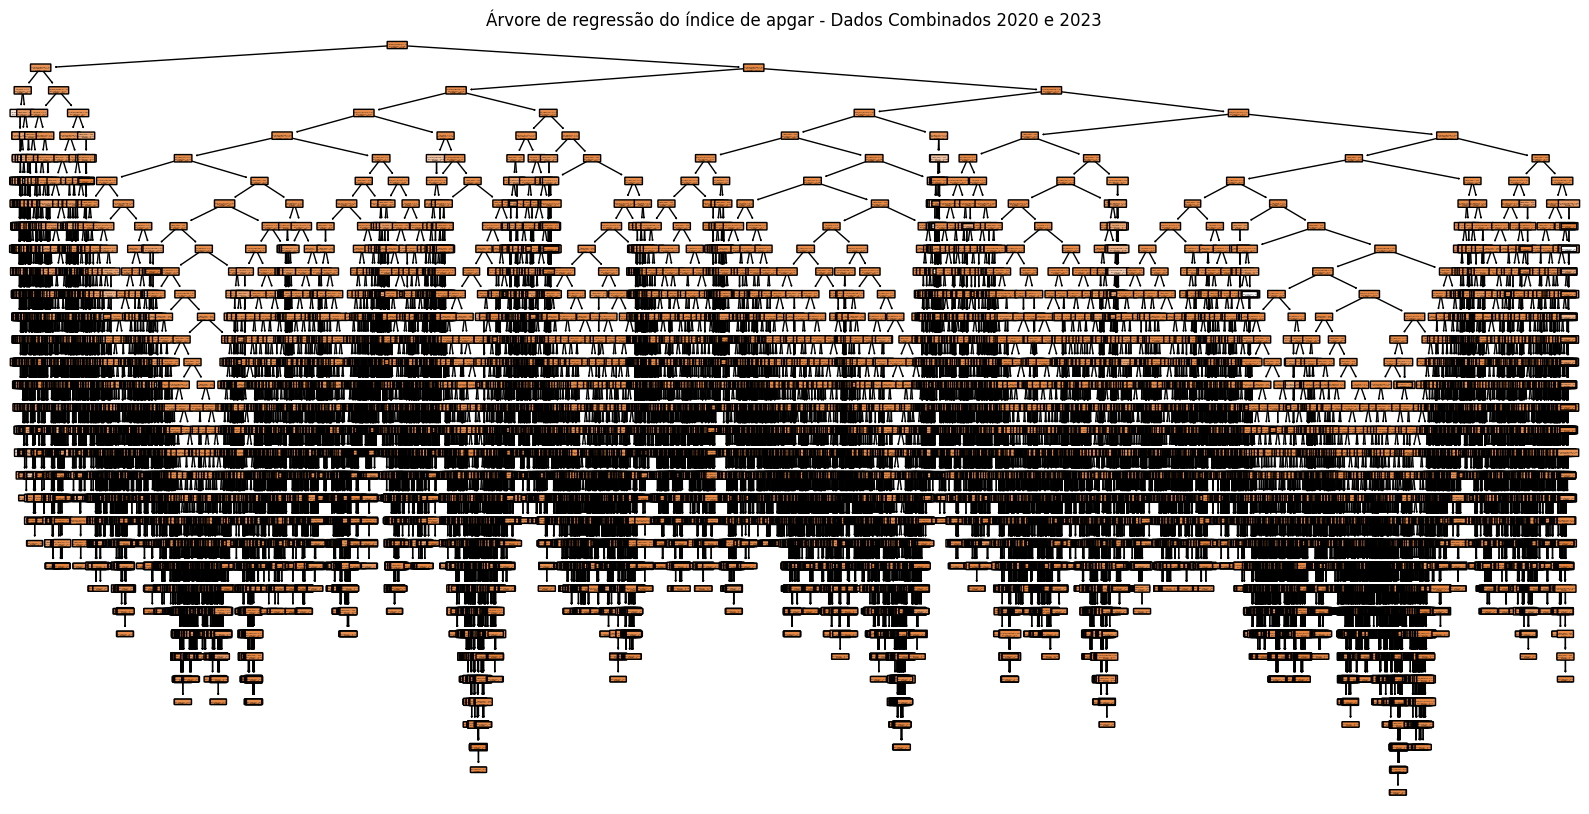

In [ ]:
#@title 4.1. Treinamento do modelo sem ajustes de hiperparâmetros
# Plotando a árvore de regressão
pyplot.figure(figsize=(20,10))
# Convert target_combinado.unique() to a list of strings
class_names = [str(x) for x in target_combinado.unique()]
plot_tree(tree_trained_comb,
          feature_names=feat_train_comb.columns,
          class_names=class_names, # Pass the list of strings
          filled=True,
          rounded=True)
pyplot.title("Árvore de regressão do índice de apgar - Dados Combinados 2020 e 2023")
pyplot.show()

In [16]:
#@title 4.2. Impressão das métricas de qualidade do modelo
# Avaliação do modelo
mse_comb = mean_squared_error(targ_test_comb, targ_predicted_comb)
mae_comb = mean_absolute_error(targ_test_comb, targ_predicted_comb)
r2_comb = r2_score(targ_test_comb, targ_predicted_comb)

print(f"Erro Absoluto Médio (MAE): {mae_comb:.4f}")
print(f"Erro Quadrático Médio (MSE): {mse_comb:.4f}")
print(f"Coeficiente de Determinação (R²): {r2_comb:.4f}")

Erro Absoluto Médio (MAE): 0.7499
Erro Quadrático Médio (MSE): 1.7356
Coeficiente de Determinação (R²): -0.3956


In [17]:
#@title 4.3. Utilização de técnica para identificação dos melhores hiperparâmetros
from sklearn.model_selection import GridSearchCV

# Definir hiperparâmetros a testar
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'max_features': [None, 'sqrt', 'log2']
}

tree = DecisionTreeRegressor(random_state=42)

grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(feat_train1, targ_train1)

print("Melhores hiperparâmetros:", grid_search.best_params_)


Melhores hiperparâmetros: {'max_depth': 5, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 2}


In [18]:
#@title 4.4. Treinamento do modelo com os melhores hiperparâmetros

#Divisão dos dados de teste e de treino
feat_train2, feat_test2, targ_train2, targ_test2 = train_test_split(
    features2020, target2020, test_size = 0.3, random_state = 2
)

In [19]:
# Criamos uma instância do novo elemento árvore com hiperparâmetro
tree_hiperparametro = DecisionTreeRegressor(max_depth=5, min_samples_leaf=1, min_samples_split=2)

#Treinamento da árvore de 2020
tree_trained2 = tree_hiperparametro.fit(feat_train2, targ_train2)
targ_predicted2 = tree_trained2.predict(feat_test2)


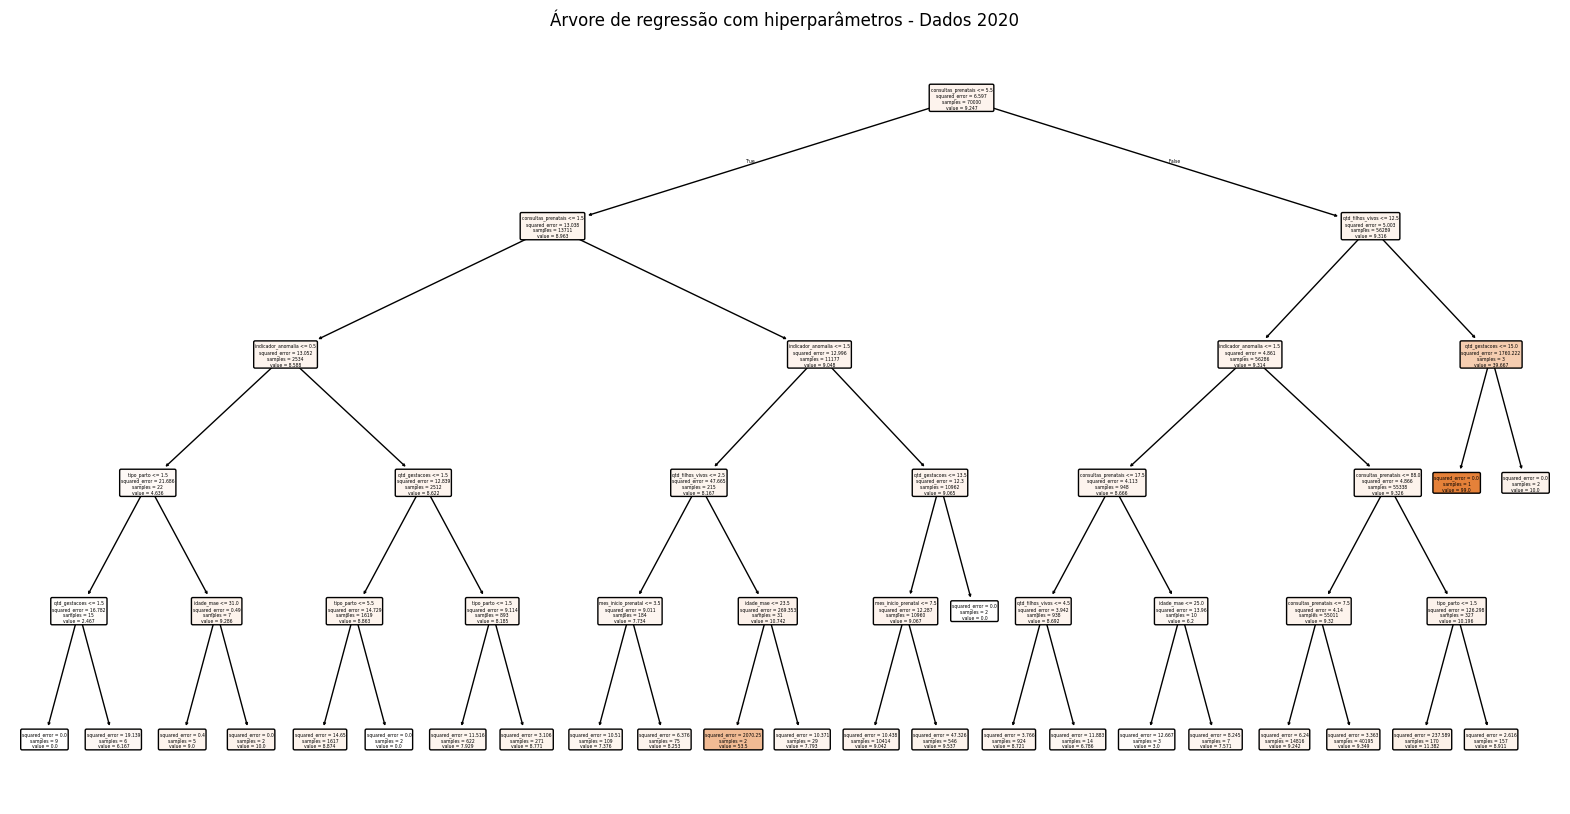

In [ ]:
# @title Plotando a árvore de regressão
pyplot.figure(figsize=(20,10))
# Convert target_combinado.unique() to a list of strings
class_names = [str(x) for x in target2020.unique()]
plot_tree(tree_trained2,
          feature_names=feat_train2.columns,
          class_names=class_names, # Pass the list of strings
          filled=True,
          rounded=True)
pyplot.title("Árvore de regressão com hiperparâmetros - Dados 2020")
pyplot.show()

In [20]:
# Avaliação do modelo
mse_2 = mean_squared_error(targ_test2, targ_predicted2)
mae_2 = mean_absolute_error(targ_test2, targ_predicted2)
r2_2 = r2_score(targ_test2, targ_predicted2)

print(f"Erro Absoluto Médio (MAE): {mae_2:.4f}")
print(f"Erro Quadrático Médio (MSE): {mse_2:.4f}")
print(f"Coeficiente de Determinação (R²): {r2_2:.4f}")

Erro Absoluto Médio (MAE): 0.8253
Erro Quadrático Médio (MSE): 8.1042
Coeficiente de Determinação (R²): -0.0894


In [21]:
# Divisão dos dados de treino e teste
feat_train_comb2, feat_test_comb2, targ_train_comb2, targ_test_comb2 = train_test_split(
    features_combinadas, target_combinado, test_size=0.3, random_state=1
)

In [22]:
# Re-treinando a árvore de regressão com os dados combinados
tree_trained_comb2 = tree_hiperparametro.fit(feat_train_comb2, targ_train_comb2)
targ_predicted_comb2 = tree_trained_comb2.predict(feat_test_comb2)


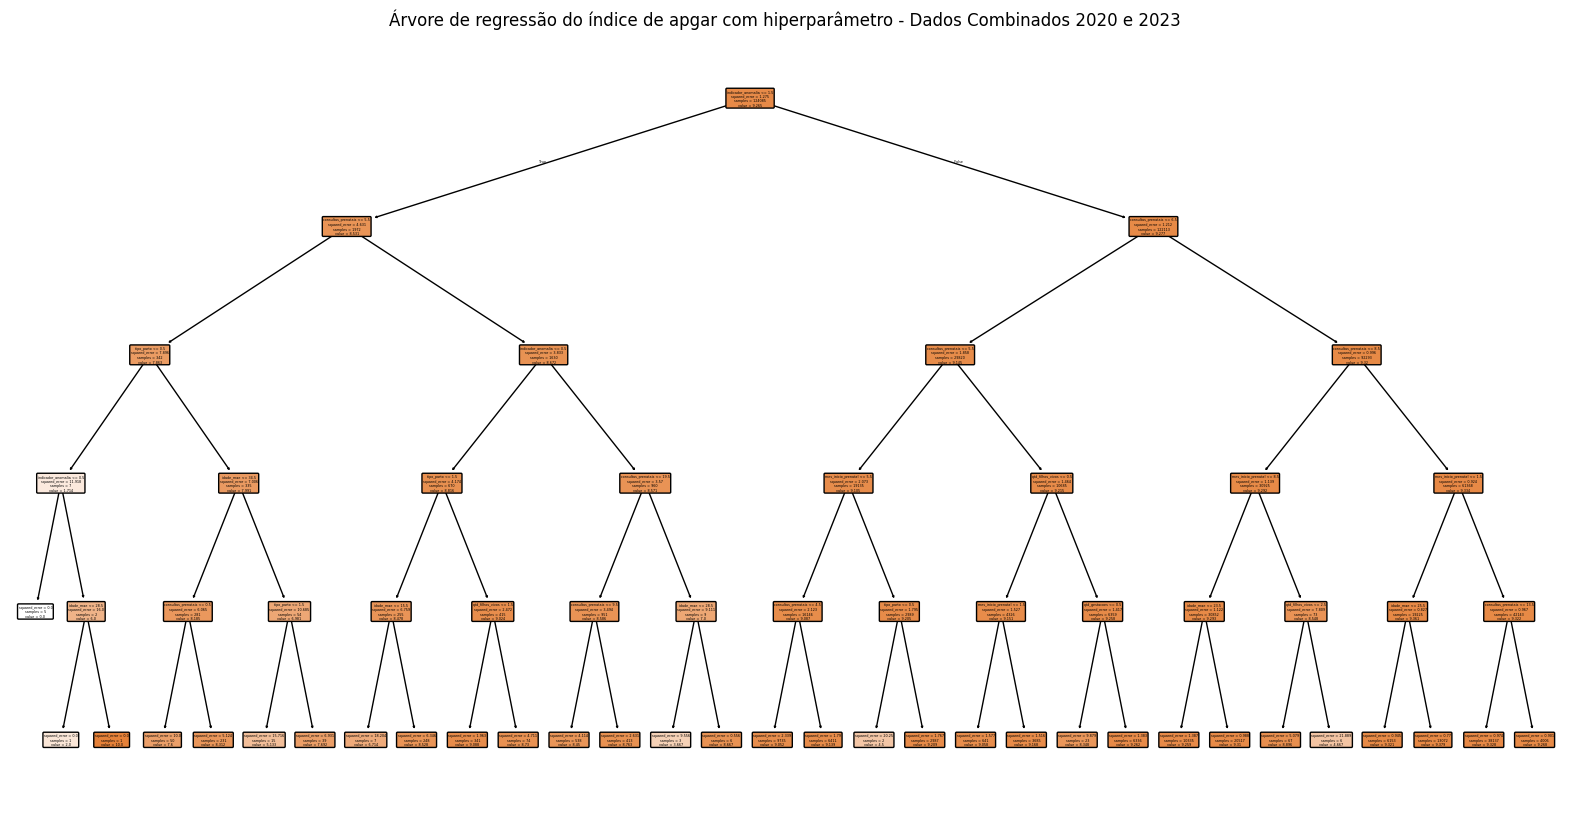

In [ ]:
# @title Plotando a árvore de regressão
pyplot.figure(figsize=(20,10))
# Convert target_combinado.unique() to a list of strings
class_names = [str(x) for x in target_combinado.unique()]
plot_tree(tree_trained_comb2,
          feature_names=feat_train_comb2.columns,
          class_names=class_names, # Pass the list of strings
          filled=True,
          rounded=True)
pyplot.title("Árvore de regressão do índice de apgar com hiperparâmetro - Dados Combinados 2020 e 2023")
pyplot.show()

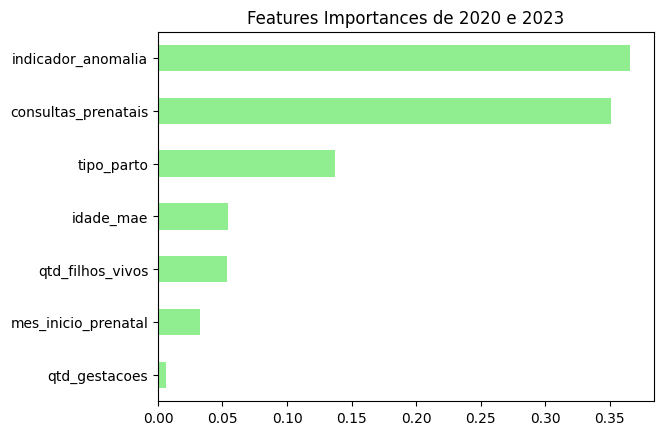

In [23]:
importances_combinadas2 = pd.Series(data=tree_trained_comb2.feature_importances_, index=features_combinadas.columns)
importances_sorted_comb2 = importances_combinadas2.sort_values()

# Apresentação do grau de importância em um gráfico
importances_sorted_comb2.plot(kind='barh', color='lightgreen')
pyplot.title('Features Importances de 2020 e 2023')
pyplot.show()
#Descrever melhor o índice de Apgar para leitura do gráfico

In [24]:
#@title 4.5. Impressão das métricas de qualidade do modelo aperfeiçoado
#@title 4.2. Impressão das métricas de qualidade do modelo
# Avaliação do modelo
mse_comb2 = mean_squared_error(targ_test_comb2, targ_predicted_comb2)
mae_comb2 = mean_absolute_error(targ_test_comb2, targ_predicted_comb2)
r2_comb2 = r2_score(targ_test_comb2, targ_predicted_comb2)

print(f"Erro Absoluto Médio (MAE): {mae_comb2:.4f}")
print(f"Erro Quadrático Médio (MSE): {mse_comb2:.4f}")
print(f"Coeficiente de Determinação (R²): {r2_comb2:.4f}")

Erro Absoluto Médio (MAE): 0.6579
Erro Quadrático Médio (MSE): 1.2315
Coeficiente de Determinação (R²): 0.0097


In [25]:
# Criar o modelo de Random Forest
forest_model = RandomForestRegressor(n_estimators=100, max_depth=4, random_state=42, min_samples_split=2)

# Treinar o modelo com os dados combinados
forest_model.fit(feat_train_comb2, targ_train_comb2)

# Fazer previsões no conjunto de teste
target_pred_forest = forest_model.predict(feat_test_comb2)

# Avaliar o modelo
mae_forest = mean_absolute_error(targ_test_comb2, target_pred_forest)
mse_forest = mean_squared_error(targ_test_comb2, target_pred_forest)
r2_forest = r2_score(targ_test_comb2, target_pred_forest)

print(f"Mean Absolute Error (MAE): {mae_forest:.4f}")
print(f"Mean Squared Error (MSE): {mse_forest:.4f}")
print(f"Coeficiente de Determinação (R²): {r2_forest:.4f}")

Mean Absolute Error (MAE): 0.6581
Mean Squared Error (MSE): 1.2282
Coeficiente de Determinação (R²): 0.0124


In [26]:
best_model = RandomForestRegressor(n_estimators=200, max_depth=10, min_samples_leaf=1, random_state=42)
best_model.fit(feat_train_comb2, targ_train_comb2)


RandomForestRegressor(max_depth=10, n_estimators=200, random_state=42)

### **05. Demonstração de uso do modelo com um dado novo.**

In [27]:
print(targ_train_comb2.mean())  # Média do índice de Apgar no conjunto de treino

9.26534230567756


In [28]:
anvil.server.connect("server_AMRWGQL4ONV4JZEQDOVPSZVQ-3TCAP4JYIK6RDWDD")

Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default Environment" as SERVER


In [44]:
@anvil.server.callable

def model_nascidos(idade_mae, vivos, parto, anomalia, gestacoes, consultas, prenatal):
  # Converter os valores para float para evitar erro de string
  entrada = np.array([[float(idade_mae), float(vivos), float(parto),
                       float(anomalia), float(gestacoes), float(consultas), float(prenatal)]])

  # Fazer a predição
  classification = best_model.predict(entrada)

  # classification = best_model.predict([[idade, prenatais, anomalia, gestacoes, vivos, mortos, semanas]])
  return float(classification[0])

In [52]:
anvil.server.wait_forever()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
 # Para baixar o modelo e importá-lo no Anvil
import joblib
from google.colab import files

model = joblib.dump(best_model, "best_model.skmodel")[0]
files.download(model)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [51]:
# O dado pode ser inventado.
# O importante é mostrar o funcionamento do modelo.
# Criando um dataset fictício só para teste
np.random.seed(42)
data = pd.DataFrame({
    'idade_mae': np.random.randint(18, 50, 100),
    'qtd_filhos_vivos': np.random.randint(0, 15, 100),
    'tipo_parto': np.random.randint(1, 2, 100),
    'indicador_anomalia': np.random.randint(1, 2, 100),
    'qtd_gestacoes': np.random.randint(0, 15, 100),
    'consultas_prenatais': np.random.randint(1, 10, 100),
    'mes_inicio_prenatal': np.random.randint(1, 9, 100),
    'apgar': np.random.uniform(1, 10, 100)
})
data.head(10)
# Fazendo previsões
y_pred = best_model.predict(feat_test_comb2)

# Avaliação do modelo
mae_florest = mean_absolute_error(targ_test_comb2, target_pred_forest)
mse_florest = mean_squared_error(targ_test_comb2, target_pred_forest)
r2_florest = r2_score(targ_test_comb2, target_pred_forest)

print(f" Mean Absolute Error (MAE): {mae_florest:.4f}")
print(f" Mean Squared Error (MSE): {mse_florest:.4f}")
print(f" Coeficiente de Determinação (R²): {r2_florest:.4f}")

# 🔹 Testando uma previsão manualmente
exemplo = np.array([[20, 1, 1, 2, 1, 9, 1]])  # Entrada de teste (idade, filhos vivos, parto, etc.)
predicao = best_model.predict(exemplo)

print(f"\nPrevisão do Índice de Apgar: {predicao[0]:.2f}")


 Mean Absolute Error (MAE): 0.6581
 Mean Squared Error (MSE): 1.2282
 Coeficiente de Determinação (R²): 0.0124

Previsão do Índice de Apgar: 9.33


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [48]:
data.head(10)

,idade_mae,qtd_filhos_vivos,tipo_parto,indicador_anomalia,qtd_gestacoes,consultas_prenatais,mes_inicio_prenatal,apgar
0,24,14,1,1,3,3,4,3.229579
1,37,1,1,1,12,6,2,4.203754
2,46,9,1,1,3,7,3,7.820615
3,32,11,1,1,13,0,2,1.129541
4,28,1,1,1,4,5,0,2.044654
5,25,9,1,1,6,7,0,1.414024
6,46,13,1,1,6,4,4,1.366559
7,38,3,1,1,12,3,5,8.699145
8,24,13,1,1,14,1,2,7.332921
9,43,14,1,1,10,5,8,5.267564


## <font color=green size=6>**Esclarecimentos e Requisitos do projeto**</font>

1. Não faça uma cópia deste arquivo. Trabalhe nele. Cuide, ainda, de preencher todos os campos solicitados. Os comentários feitos nas células de código não devem ser removidos, pois serão usados na correção dos trabalhos.